In [2]:
import numpy as np
import pandas as pd
import math
import cmath
from scipy.optimize import root
from scipy.integrate import odeint
from __future__ import division
from scipy import *
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

# Evaluation des modèles pour l'extraction supercritique

L'extraction supercritique est de plus en plus utilisée afin de retirer des matières organiques de différents liquides ou matrices solides. Cela est dû au fait que les fluides supercritiques ont des avantages non négligeables par rapport aux autres solvants, ils ont des caractèreistiques comprises entre celles des gaz et celles des solides. En changeant la température et la pression ils peuvent capter des composés différents, ils sont donc très efficaces. 
Le méchanisme de l'extraction supercritique est le suivant : 
- Transport du fluide vers la particule, en premier lieu sur sa surface et en deuxième lieu a l'intérieur de la particule par diffusion
- Dissolution du soluté avec le fluide supercritique 
- Transport du solvant de l'intérieur vers la surface de la particule 
- Transport du solvant et des solutés de la surface de la particule vers la masse du solvant 

A - Le modèle de Reverchon : 
    
Afin d'utiliser ce modèle, définissons les variables qui vont y être admises, ci-dessous la nomenclature du modèle :
    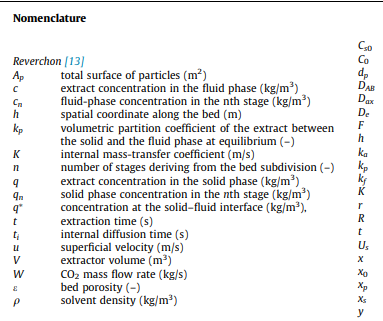
    
Le modèle : 
Il est basé sur l'intégration des bilans de masses différentielles tout le long de l'extraction, avec les hypothèses suivants : 
- L'écoulement piston existe à l'intérieur du lit, comme le montre le schéma ci-contre : 
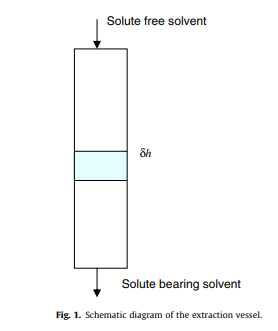
- La dispersion axiale du lit est négligeable
- Le débit, la température et la pression sont constants

Cela nous permet d'obtenir les équations suivantes :
- $uV.\frac{\partial c_{c}}{\partial t}+eV.\frac{\partial c_{c}}{\partial t}+ AK(q-q*) = 0$
- $(1-e).V.uV*\frac{\partial c_{q}}{\partial t}= -AK(q-q*)$

- Les conditions initiales sont les suivantes : C = 0, q=q0 à t = 0 et c(0,t) à h=0

La phase d'équilibre est : c = k.q*

Sachant que le fluide et la phase sont uniformes à chaque stage, nous pouvons définir le modèle en utilisant les équations différentielles ordinaires (2n). Les équations sont les suivantes :
-  $(\frac{W}{p}).(Cn- Cn-1) + e (\frac{v}{n}).(\frac{dcn}{dt})+(1-e).(\frac{v}{n}).(\frac{dcn}{dt}) = 0$
- $(\frac{dqn}{dt} = - (\frac{1}{ti})(qn-qn*)$
- Les conditions initiales sont : cn = 0, qn = q0 à t = 0 

# Ejemplo ODE

In [4]:
import numpy as np
from scipy import integrate
from matplotlib.pylab import *

In [5]:
def tank(t, y):
    """
    Dynamic balance for a CSTR
 
    C_A = y[0] = the concentration of A in the tank, mol/L
 
    Returns dy/dt = F/V*(C_{A,in} - C_A) - k*C_A^2
    """
    F = 20.1     # L/min
    CA_in = 2.5  # mol/L
    V = 100      # L
    k = 0.15     # L/(mol.min)
 
    # Assign some variables for convenience of notation
    CA = y[0]
 
    # Output from ODE function must be a COLUMN vector, with n rows
    n = len(y)      # 1: implies its a single ODE
    dydt = np.zeros((n,1))
    dydt[0] = F/V*(CA_in - CA) - k*CA**2
    return dydt
 
# The ``driver`` that will integrate the ODE(s):
#if __name__ == '__main__':
 
# Start by specifying the integrator:
# use ``vode`` with "backward differentiation formula"
r = integrate.ode(tank).set_integrator('vode', method='bdf')
 
# Set the time range
t_start = 0.0
t_final = 5.0
delta_t = 0.1
# Number of time steps: 1 extra for initial condition
num_steps = np.floor((t_final - t_start)/delta_t) + 1
print(num_steps)
 
# Set initial condition(s): for integrating variable and time!
CA_t_zero = 0.5
r.set_initial_value([CA_t_zero], t_start)
 
# Additional Python step: create vectors to store trajectories
t = np.zeros((num_steps, 1))
CA = np.zeros((num_steps, 1))
t[0] = t_start
CA[0] = CA_t_zero
 
# Integrate the ODE(s) across each delta_t timestep
k = 1
while r.successful() and k < num_steps:
    r.integrate(r.t + delta_t)
 
    # Store the results to plot later
    t[k] = r.t
    CA[k] = r.y[0]
    k += 1
    
# All done!  Plot the trajectories:
plot(t, CA)
grid('on')
xlabel('Time [minutes]')
ylabel('Concentration [mol/L]')

51.0


TypeError: 'numpy.float64' object cannot be interpreted as an integer

# Ejemplo 2 funciona

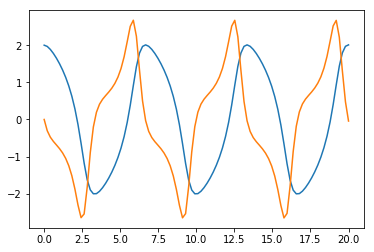

In [7]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

def vdp1(t, y):
    return np.array([y[1], (1 - y[0]**2)*y[1] - y[0]])

t0, t1 = 0, 20                # start and end
t = np.linspace(t0, t1, 100)  # the points of evaluation of solution
y0 = [2, 0]                   # initial value
y = np.zeros((len(t), len(y0)))   # array for solution
y[0, :] = y0

r = integrate.ode(vdp1).set_integrator("dopri5")  # choice of method
r.set_initial_value(y0, t0)   # initial values

for i in range(1, t.size):
   y[i, :] = r.integrate(t[i]) # get one more value, add it to the array
   if not r.successful():
       raise RuntimeError("Could not integrate")

plt.plot(t, y)
plt.show()